Twitter_volume_FB_filled.csv


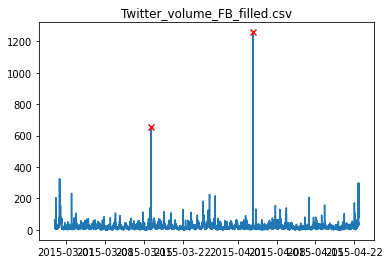

elb_request_count_8c0756_filled.csv


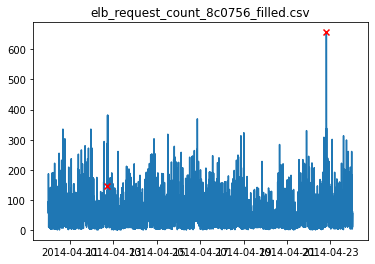

FARM_filled.csv


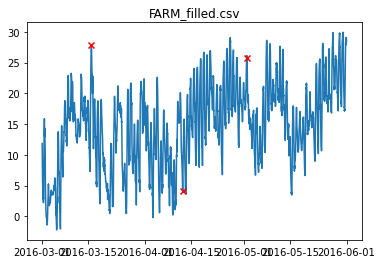

ec2_cpu_utilization_ac20cd_nofill.csv


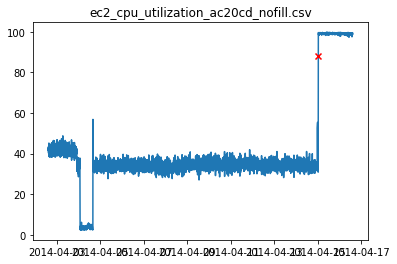

ambient_temperature_system_failure_filled.csv


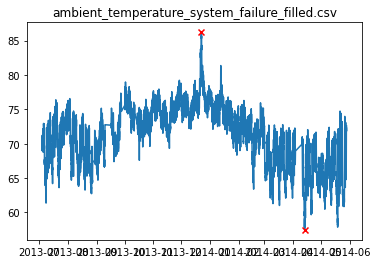

ibm-common-stock-closing-prices_nofill.csv


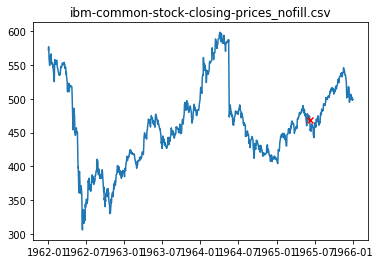

rds_cpu_utilization_cc0c53_filled.csv


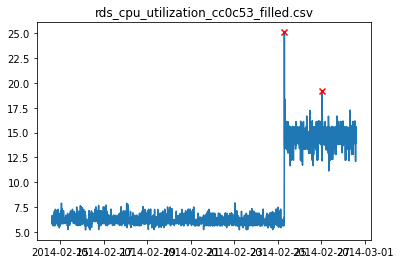

exchange-2_cpc_results_nofill.csv
Duplicate records found: 
                        value  outlier
timestamp                             
2011-08-24 12:00:01  0.131250      NaN
2011-08-24 12:00:01  0.119453      NaN
Removing duplicates and keeping:  
                       value  outlier
timestamp                            
2011-08-24 12:00:01  0.13125      NaN


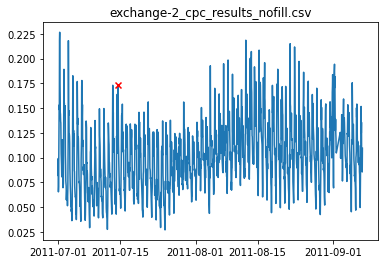

exchange-2_cpm_results_nofill.csv
Duplicate records found: 
                        value  outlier
timestamp                             
2011-08-24 12:00:01  0.408490      NaN
2011-08-24 12:00:01  0.461745      NaN
Removing duplicates and keeping:  
                       value  outlier
timestamp                            
2011-08-24 12:00:01  0.40849      NaN


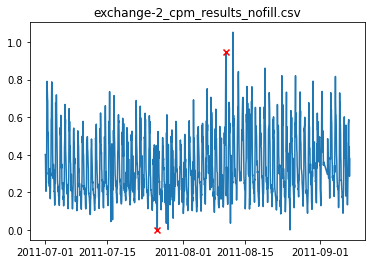

ec2_cpu_utilization_ac20cd_filled.csv


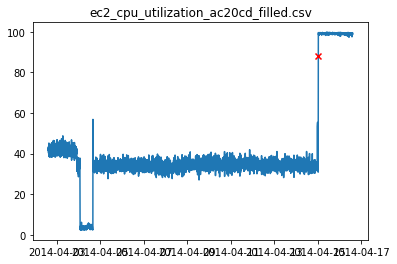

rds_cpu_utilization_cc0c53_nofill.csv


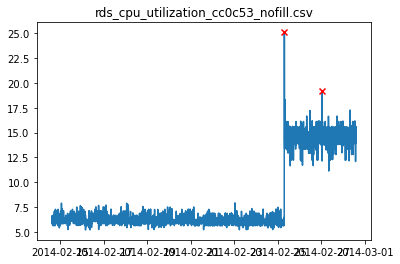

rds_cpu_utilization_e47b3b_filled.csv


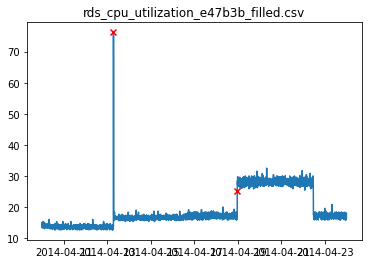

international-airline-passengers_filled.csv


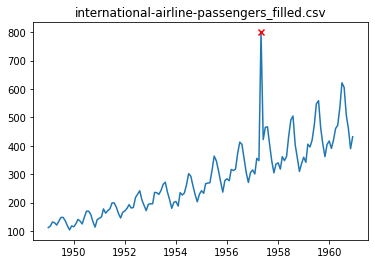

art_daily_flatmiddle_filled.csv


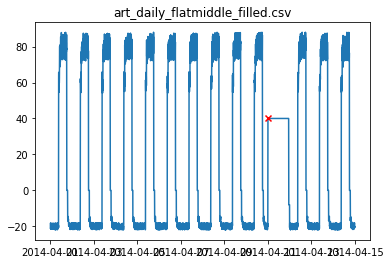

artificial_cd_3_filled.csv


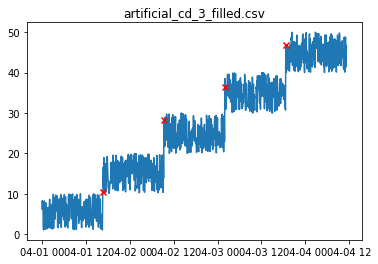

grok_asg_anomaly_filled.csv


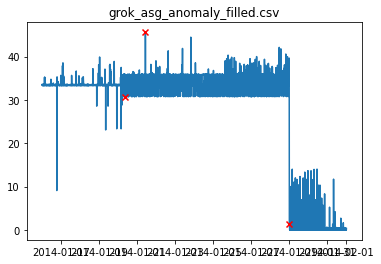

ec2_cpu_utilization_5f5533_filled.csv


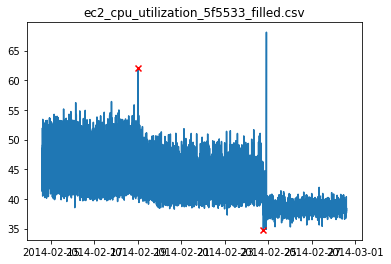

exchange-3_cpc_results_filled.csv


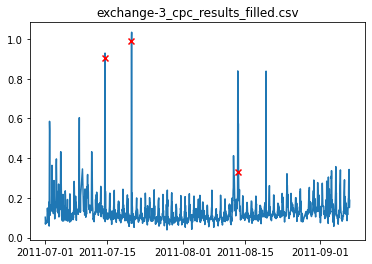

exchange-2_cpm_results_filled.csv


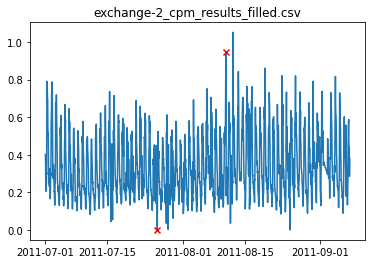

exchange-3_cpm_results_nofill.csv


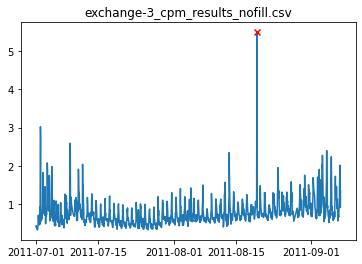

artificial_cd_1_filled.csv


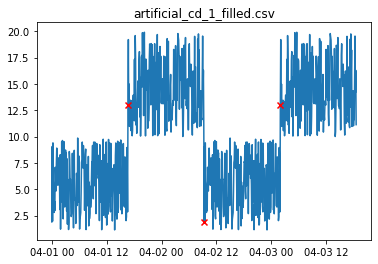

exchange-3_cpc_results_nofill.csv


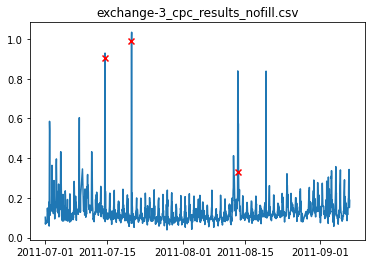

exchange-3_cpm_results_filled.csv


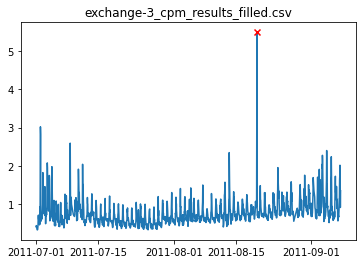

artificial_cd_3_nofill.csv


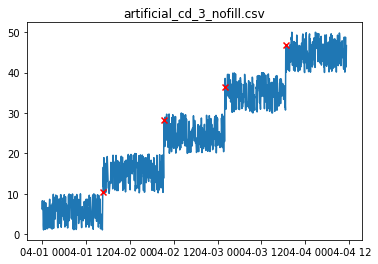

artificial_cd_2_filled.csv


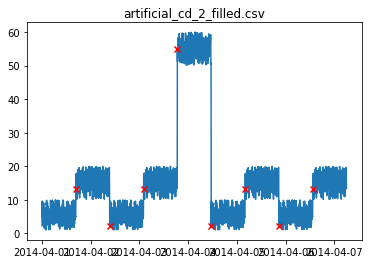

elb_request_count_8c0756_nofill.csv


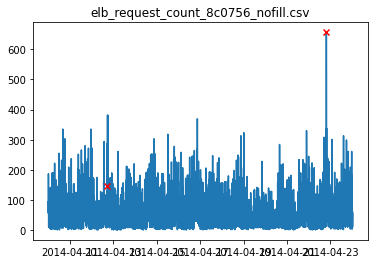

all_data_gift_certificates_filled.csv


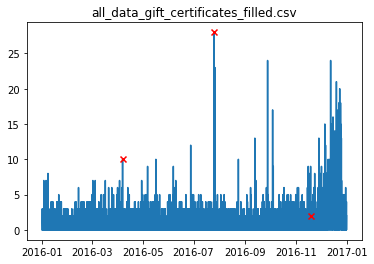

Twitter_volume_AMZN_filled.csv


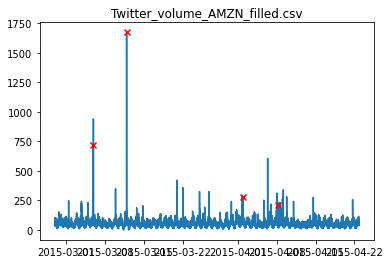

exchange-2_cpc_results_filled.csv


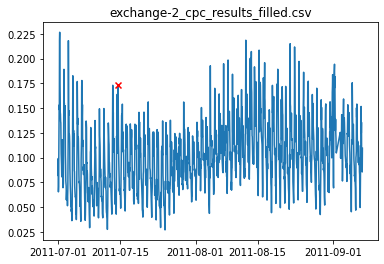

artificial_cd_1_nofill.csv


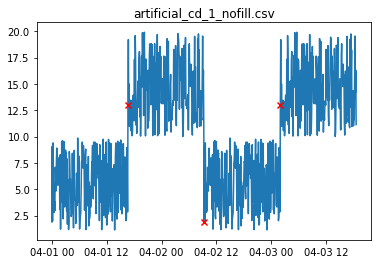

art_daily_nojump_filled.csv


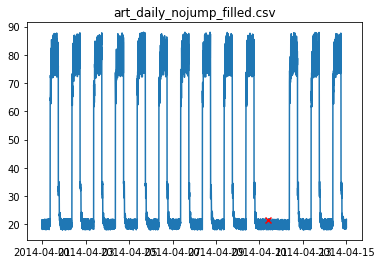

ibm-common-stock-closing-prices_filled.csv


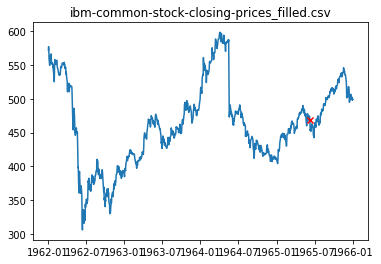

ambient_temperature_system_failure_nofill.csv


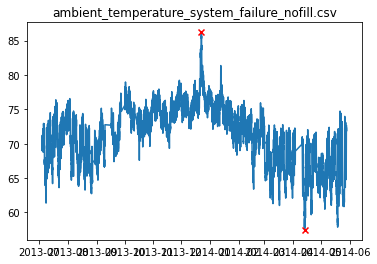

Twitter_volume_GOOG_filled.csv


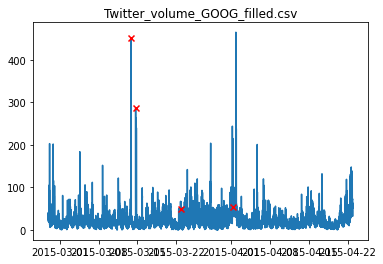

In [1]:
import sys  
sys.path.append("../time_series")  
from time_series import TimeSeries
import time_series_helpers as th
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

to_include = {'Twitter_volume_FB_filled.csv':["5min","%Y-%m-%d %H:%M:%S", "P","Y"], 
			  'elb_request_count_8c0756_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","Y"], 
			  'FARM_filled.csv':["30min","%Y-%m-%d %H:%M:%S", "P,C","N"], 
			  'ec2_cpu_utilization_ac20cd_nofill.csv':["5min","%Y-%m-%d %H:%M:%S", "P,C","Y"], 
			  'ambient_temperature_system_failure_filled.csv':["1H","%Y-%m-%d %H:%M:%S", "P","Y"], 
			  'ibm-common-stock-closing-prices_nofill.csv':["1D","%Y-%m-%d", "C","N"], 
			  'rds_cpu_utilization_cc0c53_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","Y"], 
			  'exchange-2_cpc_results_nofill.csv':["1H","%Y-%m-%d %H:%M:%S", "C","Y"], 
			  'exchange-2_cpm_results_nofill.csv':["1H","%Y-%m-%d %H:%M:%S","P","Y"], 
			  'ec2_cpu_utilization_ac20cd_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","Y"], 
			  'rds_cpu_utilization_cc0c53_nofill.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","Y"], 
			  'rds_cpu_utilization_e47b3b_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","Y"], 
			  'international-airline-passengers_filled.csv':["1MS","%Y-%m","P","N"], 
			  'art_daily_flatmiddle_filled.csv':["5min","%Y-%m-%d %H:%M:%S","C","Y"], 
			  'artificial_cd_3_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","N"], 
			  'grok_asg_anomaly_filled.csv':["5min","%Y-%m-%d %H:%M:%S", "P,C","Y"], 
			  'ec2_cpu_utilization_5f5533_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","Y"], 
			  'exchange-3_cpc_results_filled.csv':["1H","%Y-%m-%d %H:%M:%S","P","Y"], 
			  'exchange-2_cpm_results_filled.csv':["1H","%Y-%m-%d %H:%M:%S","P","Y"], 
			  'exchange-3_cpm_results_nofill.csv':["1H","%Y-%m-%d %H:%M:%S","P","Y"], 
			  'artificial_cd_1_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","N"],
			  'exchange-3_cpc_results_nofill.csv':["1H","%Y-%m-%d %H:%M:%S","P","Y"], 
			  'exchange-3_cpm_results_filled.csv':["1H","%Y-%m-%d %H:%M:%S","P","Y"], 
			  'artificial_cd_3_nofill.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","N"], 
			  'artificial_cd_2_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","N"], 
			  'elb_request_count_8c0756_nofill.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","Y"], 
			  'all_data_gift_certificates_filled.csv':["1H","%Y-%m-%d %H:%M:%S","P,C","N"], 
			  'Twitter_volume_AMZN_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","Y"], 
			  'exchange-2_cpc_results_filled.csv':["1H","%Y-%m-%d %H:%M:%S","C","Y"], 
			  'artificial_cd_1_nofill.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","N"], 
			  'art_daily_nojump_filled.csv':["5min","%Y-%m-%d %H:%M:%S","C","Y"], 
			  'ibm-common-stock-closing-prices_filled.csv':["1D","%Y-%m-%d","C","N"], 
			  'ambient_temperature_system_failure_nofill.csv':["1H","%Y-%m-%d %H:%M:%S","P","Y"], 
			  'Twitter_volume_GOOG_filled.csv':["5min","%Y-%m-%d %H:%M:%S","P,C","Y"]}

for filename in to_include:
	print(filename)

	df = pd.read_csv('../datasets/' + filename, header=0)
	ts = TimeSeries(df, timestep=to_include[filename][0], dateformat=to_include[filename][1])

	ys = ts.dataframe[ts.dataframe["outlier"]==1]["value"].values
	xs = list(ts.dataframe[ts.dataframe["outlier"]==1].index)
	plt.plot(ts.dataframe["value"])
	plt.scatter(xs,ys,marker="x",c="red",zorder=200)
	plt.title(filename)
	plt.show()